## Phys 434: Lab 1 - Statistics
1. <br> 
To begin the lab, it is important to understand what normal distribution is along with how to calculate something known as the sigma value. In physics, 'sigma' is associated with a probability. In this lab we will figure out a way to determine sigma given a probability. <br>

In order to complete this lab, I personally chose to use python via the jupyternotebook. It will be necessary to import several libraries in order to do the required tasks for this lab. The required imports are listed below. <br>
<br>
  <strong> a) Normal Distrubtion: </strong> <br> 
The Gaussian also known as the normal distribution is a probability function that desribes how values are distrubuted. When plotted, resembles a bell shaped curve. Here, the distribution is symmetric about the center where there is no bias left or right. The normal distribution has two parameters, the mean and the standard deviation. The mean defines location of the peak which for Gaussian is the central region of the distribution. The Standard Deviation measures variability and defines the width of distribution. The z-score determines the number of standard deviations a data point is from the mean. The standard normal distribution is the gaussian distribution of a random variable with the mean $\mu=0$ and standard deviation $\sigma=1$ <br>
       <br>
    
  <strong> b) Integrating the standard normal distribution: </strong> <br>
  From lecture, we learned that integrating the standard normal distrubution results in probabilities as the output. <br>
  With that, scipy provides the cdf function (cumulative distribution function) that allows us to perfom such integration and obtain a probability. <br>
  The paramters that are inputed into this function are set to the normal distrubition where the sigma is implicitly the gaussian distrubition, as stated earlier. Below, I input several different values of sigma and compare the the probability with the z-chart on the wikipedia page. If the sigma falls to the right of the distribution, subtract a half from the resulting probability. Reason being, the Z-score table is cumulative from the mean, 0 to z.

In [429]:
import scipy
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt


plt.rcParams["figure.figsize"] = (15,10)

In [430]:
p = stats.norm.cdf(1)
print("Probability: " + str(p -.5))
p1 = stats.norm.cdf(3)
print("Probability: " + str(p1 -.5))

Probability: 0.3413447460685429
Probability: 0.4986501019683699


  <strong> c) Take inverse to for probability </strong> <br>
 The probability that a value lies 1𝜎 from the mean is .34, and .49 3𝜎 from the mean.  In order to obtain the sigma value from the probability we determined by integration, it is necessary to take the inverse. This can be done by using the function ppf function in scipy. Plugging in the probability values from above we get back the sigma value that was used to determine the probabilities. As shown below, we obtain 1𝜎 and 3𝜎, respectively from their relative probabilities.

In [431]:
s = stats.norm.ppf(p)
print("X𝜎: " + str(s))
s1 = stats.norm.ppf(p1)
print("X𝜎: " + str(s1))

X𝜎: 1.0
X𝜎: 2.9999999999999982


  d) When a minus sign appears that means that the probability falls on  the left side of the normal distribution, that is, to the left of the mean.

2.
  Our next task is to explore a different continuous analytic distributions something different from the Gaussian. <br>
  Our options are: Rayleigh; Lognormal; Chi-Squared or Gamma; or Exponential. <br>
  I chose the exponential distribution. We will want to plot a histrogram of the distribution along with another plot with the probability density function over the histrogram, the latter will be plotted with a semi-log plot.
   
   <strong> a) Exponential distribution </strong> <br>
   The exponential distribution is often used to depict the amount of time until some specific event occurs. Lambda (𝜆) is the rate distribution. The mean is essentially is the inverse of lambda. If lambda gets larger, that means the rate at which we anticipare an event to occur at a quicker rate. Likewise, if lambda gets smaller, the rate is declining. <br>
   <br>
   To plot the distribution, the exponential built-in function will be needed with a roughly 100k size sample.
   

In [458]:
d1 = stats.expon.rvs(loc = 0, scale = 1, size = 100000)

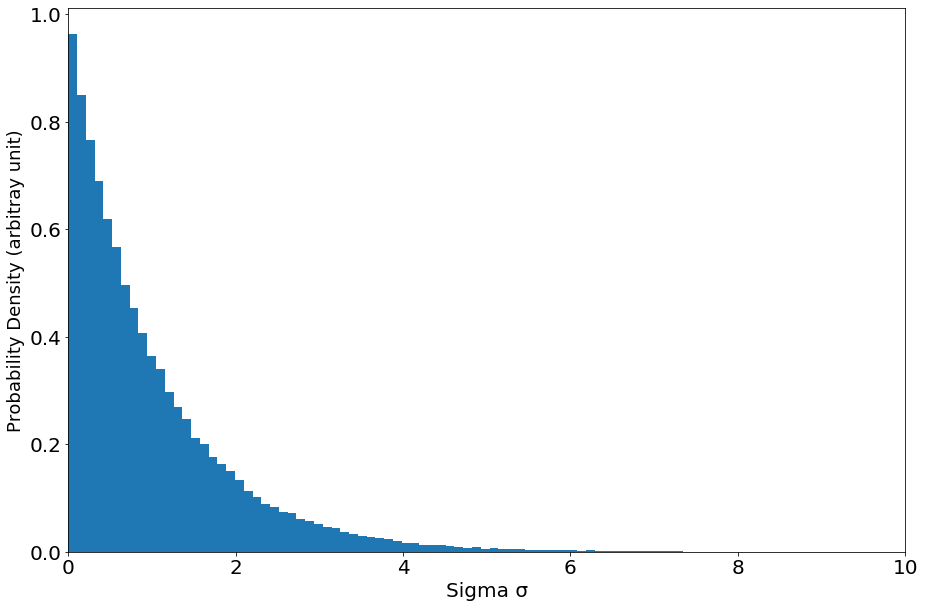

In [459]:
fig, ax = plt.subplots(1, 1)
ax.hist(d1,100, density=True)
plt.tick_params(labelsize = 20)
plt.xlim([0,10])
plt.xlabel("Sigma σ", size= 20)
plt.ylabel("Probability Density (arbitray unit)", size=18)
x = np.linspace(0,10,1000)
plt.show()


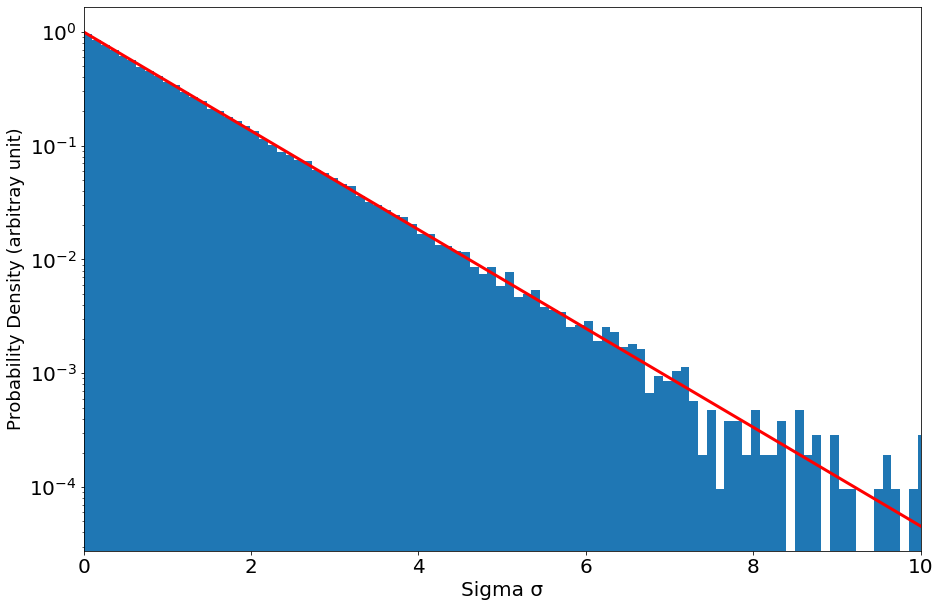

In [462]:
fig, ax = plt.subplots(1, 1)
ax.hist(d1,100, density=True)
plt.tick_params(labelsize = 20)
plt.xlim([0,10])
plt.yscale('log')
x = np.linspace(0,10,1000)
plt.xlabel("Sigma σ", size= 20)
plt.ylabel("Probability Density (arbitray unit)", size=18)
ax.plot(x,stats.expon.pdf(x,loc = 0, scale = 1), 'r-', linewidth = 3)
plt.show()


3. <br>
Let's now explore how to determine the probability of X𝜎 when the data is no longer Gaussian, but instead exponential for our case.  For example, if we have radioactive subtance and we measure its decay over time and somehow end up with slightly more subtance than anticipated, what is the probability that after sometime - let's say 2 years for our hypotheitcal measurement - was produced by some sort of signal?<br>

  <br>
Converting this word question into math integral: 
      For the exponential distribution it is: 
      $$P(x) = \int_2^\infty f(x) \,dx= F(\infty) - F(2) = 1 - F(2)$$
      
 Using .cdf() and .ppf() functions to determine the probability that the background produced the signal.

In [438]:
prob = 1 - stats.expon.cdf(2)
print("Probability of measurement: " + str(prob))

Probability of measurement: 0.1353352832366127


Converting the probability that signal was produced by background to its equivalent sigma 

In [439]:
sigma = stats.expon.ppf(1 - prob)
print("Sigma: " + str(sigma))

Sigma: 2.0


As we can see there is 2𝜎 certainty that the observed measurment around 2 years was a signal.

4. <br>
Trying various hypothetical measurements and exploring the probabilities and its relative sigma value. 

In [441]:
prob1 = stats.expon.cdf(2)
print(prob)
sigma1 = stats.expon.ppf(prob1)
print(sigma1)

0.8646647167633873
2.0


## Non-continuous distributions 
Within physics often times we are counting descrete events. For example, when detecting the number of gamma-rays we are able to detect 9 or 10, but not 9.2 - it makes no sense, as a result continuous distributions are irrelecant, therefore, discrete distributions must be used. The two most common types of discrete distributions include the Binomial and the Poisson. For this section, I have chosen to study the Poisson distribution. <br>

1. <br>
a). The Poisson distribution is a discrete function, meaning that some event is measured as either occuring or not occuring. In other words, this distribution tells us how many times an event is likely to occure within a specified period of time. A variable can only be measured as an integer value, hence it being a "discrete" function. Additionally, there is a finite probability of having zero counts. On a plot, the distribution peaks at the average value and is assymetric about the mean - it is always skewed toward the right, as shown in the image below. As the rate (lambda, λ) increases the distribution looks more like a Gaussian. <br>
<br>

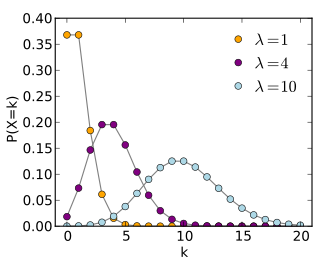 <br>

<br>
In a poisson distribution, one parameter, mu (μ) is needed to determine the probability of an event. Mu is the average number occurences in a given time period. That said, the mean and the variance of the Poisson distribution are both equal to μ. <br>

b). Now, let's use the poisson function in python and plot the poisson distribution with varying parameters. Below, I have chosen the lambda to be 2 and 5. As mentioned previously, as lambda increases the distribution resembles that of a gaussian. 

In [442]:
d3 = stats.poisson.rvs(1,loc = 0, size = 1000)

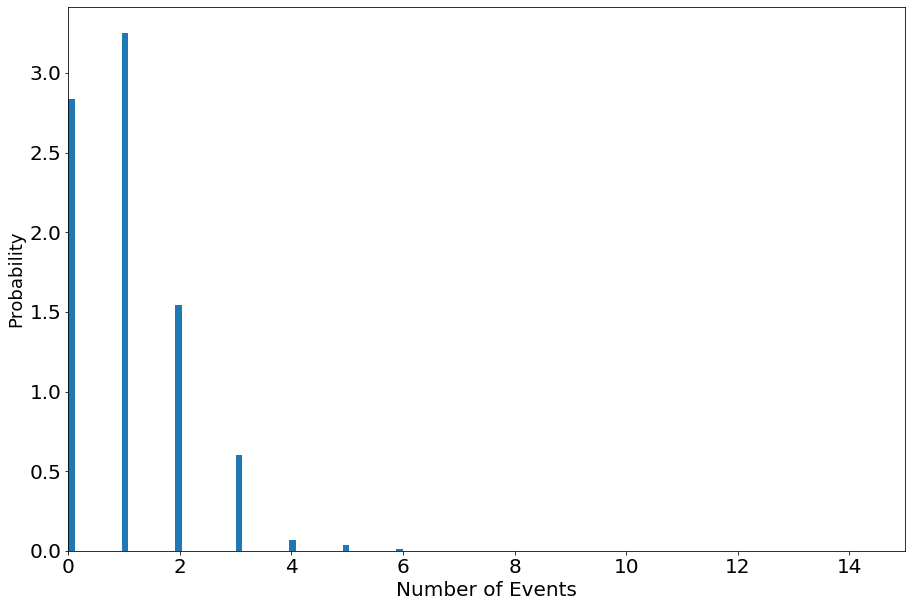

In [443]:
fig, ax = plt.subplots(1, 1)
ax.hist(d3,50, density=True)
plt.tick_params(labelsize = 20)
plt.xlim([0,15])
#x = np.linspace(0,10,1000)
plt.xlabel("Number of Events", size= 20)
plt.ylabel("Probability", size=18)
plt.show()

In [444]:
d4 = stats.poisson.rvs(5,loc = 0, size = 1000)

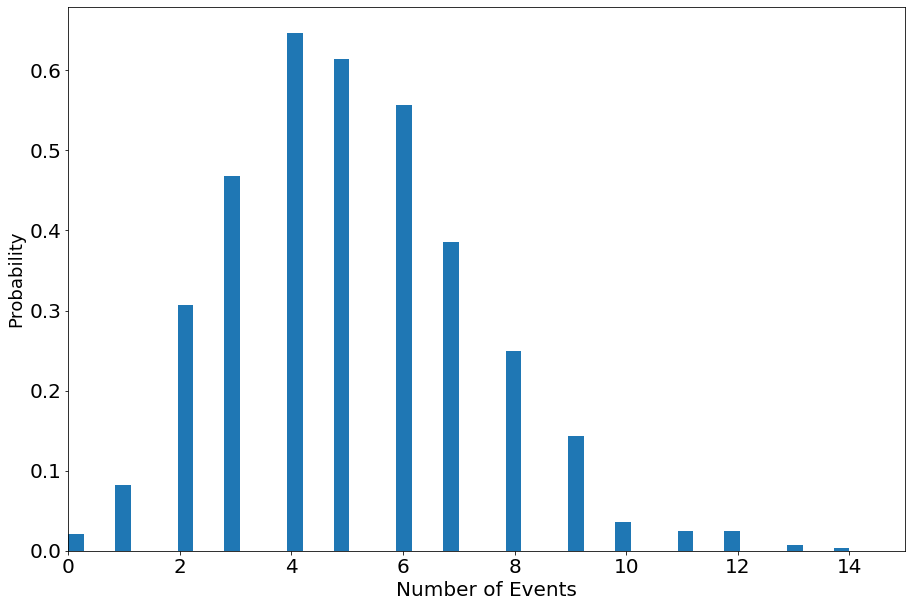

In [445]:
fig, ax = plt.subplots(1, 1)
ax.hist(d4,50, density=True)
plt.tick_params(labelsize = 20)
plt.xlim([0,15])
#x = np.linspace(0,10,1000)
plt.xlabel("Number of Events", size= 20)
plt.ylabel("Probability", size=18)
plt.show()

c) The hypothetical question we would like to pose regarding the poisson distribution is, what is the probability of 4 events occuring when the average of events occuring per time interval is 6? (Peak is at 4)

In [446]:
poissonP = 1-stats.poisson.cdf(4, 6)
print("Probability: " + str(poissonP))


Probability: 0.7149434996833688


In [447]:
poissonS = stats.norm.ppf(poissonP)
print("Sigma: " + str(1-poissonS))

Sigma: 0.4321149156787786


The probability, is about 71%, therefore, the .43 sigma certainity that 4 events will occur when the average is 6. That said, poisson distribution is discrete there cannot be 4.5 or 4.6 events occuring, however, there is can be an average of 4.5 or 4.6 events when considering several events overall. Means have the ability to be non-integer values, nevertheless, there is a limit on the sigma values since the event either occurred or did not occur. 